In [1]:
!pip install pandas scikit-learn matplotlib seaborn



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Loading the dataset
url = r"C:\Users\PC\rag_chatbot\healthcare-dataset-stroke-data.csv"
data = pd.read_csv(url)

# Checking for missing values and handle them
print("Missing values before handling:")
print(data.isnull().sum())


Missing values before handling:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [3]:

data['bmi'] = data['bmi'].fillna(data['bmi'].mean())

# Checking again if there are any missing values
print("Missing values after handling:")
print(data.isnull().sum())


Missing values after handling:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [4]:
# Drop missing values for simplicity 
data = data.dropna()

# Converting categorical data to numerical using pd.get_dummies
data = pd.get_dummies(data, drop_first=True)

# Splitting the dataset into features (X) and target (y)
X = data.drop("stroke", axis=1)
y = data["stroke"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Initialize and train the model
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

# Making predictions and evaluate accuracy
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 93.35%


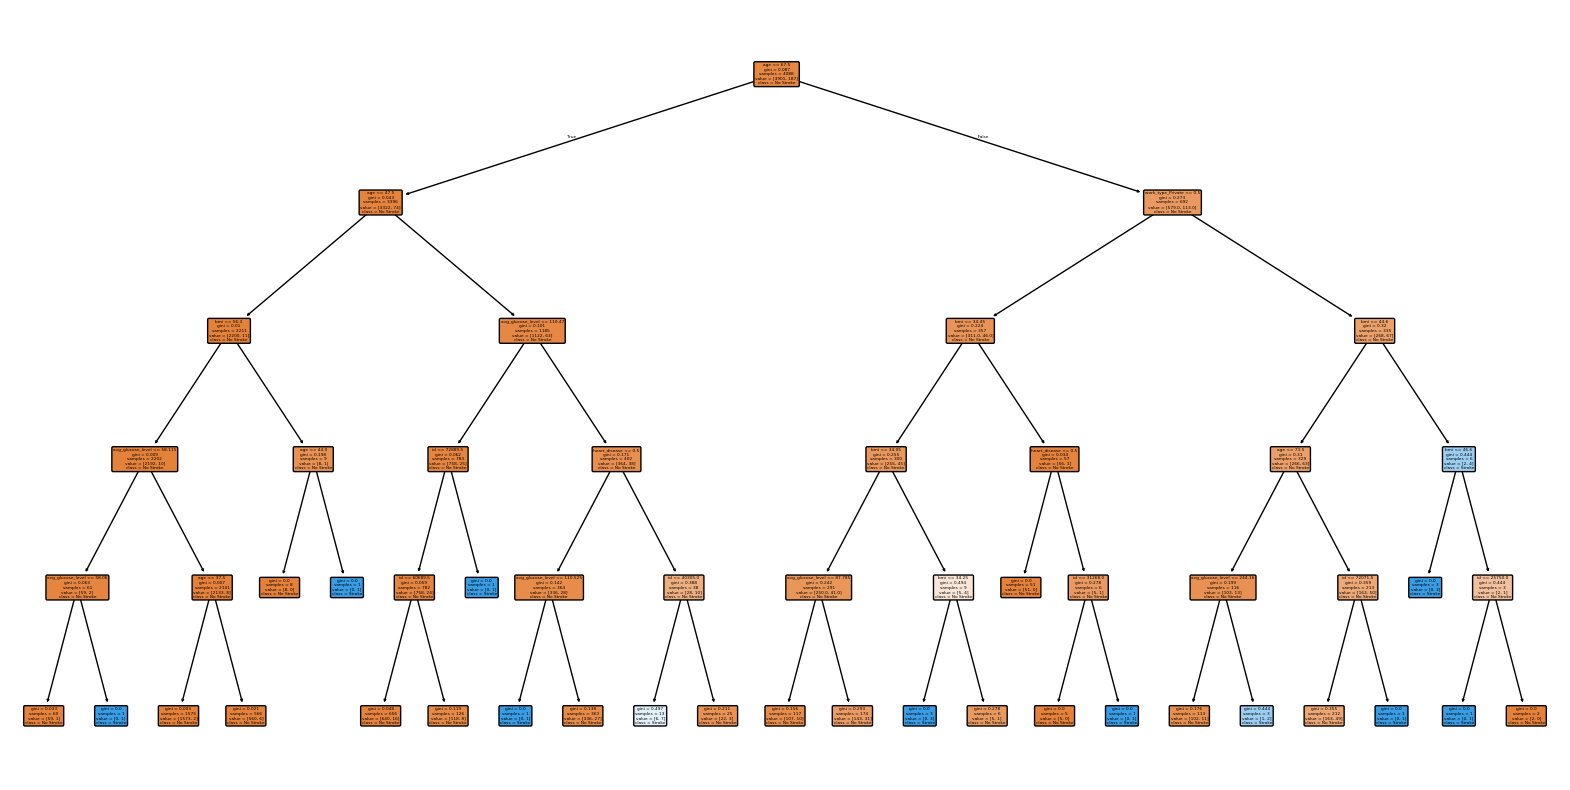

In [6]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=["No Stroke", "Stroke"], rounded=True)
plt.show()


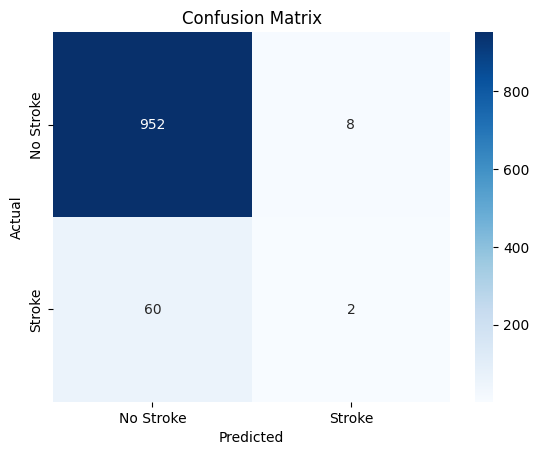

In [19]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
